In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
data = pd.read_csv('train_preprocessed.csv')
data.head()

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [2]:
Qtime = data.iloc[:,1::2].iloc[:,:20]
Qtimes = pd.DataFrame(np.where(Qtime>Qtime.median(),1,0),index = Qtime.index,columns = Qtime.columns)
data['QaE	QbE	QcE	QdE	QeE	QfE	QgE	QhE	QiE	QjE	QkE	QlE	QmE	QnE	QoE	QpE	QqE	QrE	QsE	QtE'.split('\t')] = Qtimes
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,0,1,1,0,1,0,1,1,2
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,0,1,1,0,1,0,1,1,2
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,0,1,1,1,1,0,1,1,1
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,0,1,0,1,0,1,1,1
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,1,0,1,1,1,1,1


In [3]:
Qaswer = data.iloc[:,::2].iloc[:,:20]
Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]] = 6 - Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]]
data['MachScore']=Qaswer.mean(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted,MachScore
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,0,1,1,0,1,0,1,1,2,2.95
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,0,1,1,0,1,0,1,1,2,2.60
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,0,1,1,1,1,0,1,1,1,1.90
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,1,0,1,0,1,1,1,3.35
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,0,1,1,1,1,1,3.00


In [4]:
data['Qtsum'] = data.iloc[:,1::2].iloc[:,:20].sum(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted,MachScore,Qtsum
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,1,0,1,0,1,1,2,2.95,7
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,1,0,1,0,1,1,2,2.60,20
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1,1,1,0,1,1,1,1.90,17
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,1,0,1,0,1,1,1,3.35,16
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,0,1,1,1,1,1,3.00,7


In [5]:
data[['tp02','tp04','tp06','tp08','tp10']]= 7- data[['tp02','tp04','tp06','tp08','tp10']]

data['Extraversion']= (data.tp01+data.tp06)/2
data['Agreeableness']=(data.tp02+data.tp07)/2
data['Conscientiousness']= (data.tp03+data.tp08)/2
data['Emotional Stability']= (data.tp04+data.tp09)/2
data['Openness to Experiences']= (data.tp05+data.tp10)/2
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_12,wr_13,voted,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,1,2,2.95,7,4.0,6.0,2.5,5.0,3.0
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,1,2,2.60,20,3.0,4.5,1.5,3.5,2.0
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1,1,1.90,17,2.5,3.0,1.0,1.5,3.5
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,1,1,1,3.35,16,3.0,2.0,2.5,3.5,2.5
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,3.00,7,3.0,3.0,1.0,1.5,0.5


In [6]:
data['age'] = data['age_group'].map({'10s':10, '20s':20, '30s':30, '40s':40, '50s':50, '60s':60, '+70s':70})

In [7]:
data['voted'] = data['voted'].map({1:1,2:0})

In [8]:
data['gender'] = data['gender'].map({'Male':1,'Female':0})

In [9]:
columnlist=['voted','MachScore','Agreeableness']

In [10]:
subdata = data[columnlist].copy()
subdata.head()

,voted,MachScore,Agreeableness
0,0,2.95,6.0
1,0,2.60,4.5
2,1,1.90,3.0
3,1,3.35,2.0
4,1,3.00,3.0


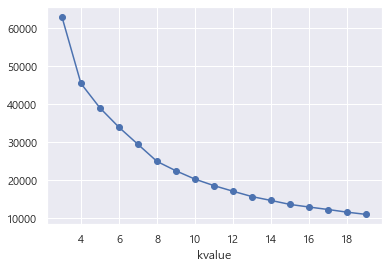

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()
scaledata= mm.fit_transform(subdata)
scaledata = pd.DataFrame(scaledata,columns = columnlist)
dist =[]
for i in range(3,20):
    km = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 200)
    km.fit(scaledata)
    dist.append(km.inertia_)
plt.plot(range(3,20),dist,marker = 'o')
#ticks = plt.xticks(range(len(dist)))
plt.xlabel('kvalue')
plt.show()

In [12]:
knn = KMeans(n_clusters =5)
knn.fit(scaledata)

df = pd.DataFrame(mm.inverse_transform(knn.cluster_centers_),columns = columnlist)
df.round(2)

## 0 번 클러스터 : 높은 마키아벨리즘 점수, 투표하지 않았음, 친화성이 높다. 
## 1번 클러스터 높은 마키아벨리즘 점수, 투표하지 않았음, 친화성이 중간정도.
## 2번 클러스터 높은 마키아벨리즘 점수, 투표하였음, 친화성 높음
## 3번 클러스터 낮은 마키아벨리즘 점수, 투표하지 않았음, 친화성이 낮음
## 4번 클러스터 낮은 마키아벨리즘 점수 투표하지 함, 친화성 낮음 

,voted,MachScore,Agreeableness
0,0.0,4.10,5.09
1,0.0,3.70,3.05
2,1.0,3.86,4.06
3,0.0,2.58,2.22
4,1.0,2.70,2.12


In [13]:
subdata['k5'] = knn.labels_

In [14]:
subdata

,voted,MachScore,Agreeableness,k5
0,0,2.95,6.0,0
1,0,2.60,4.5,3
2,1,1.90,3.0,4
3,1,3.35,2.0,4
4,1,3.00,3.0,4
...,...,...,...,...
45524,0,4.15,4.0,0
45525,0,3.80,4.0,1
45526,1,1.50,1.5,4
45527,1,2.90,4.0,2


Text(0.5, 0.92, 'Agreeableness')

<Figure size 1440x2880 with 0 Axes>

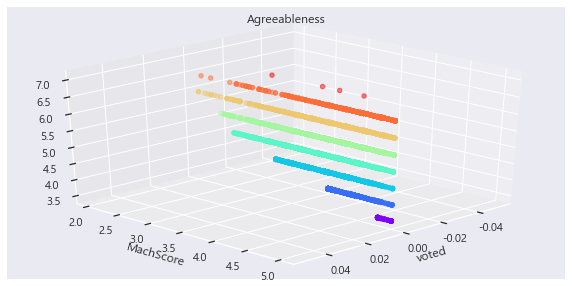

In [15]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize = (20,40))
zdata = subdata[subdata['k5'] ==0]
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') 

x = zdata.iloc[:,0]
y = zdata.iloc[:,1]
z = zdata.iloc[:,2]
ax.scatter(x, y, z, c = z, s= 20, alpha=0.5, cmap=plt.cm.rainbow)
ax.view_init(30, 45)
plt.xlabel('voted')
plt.ylabel('MachScore')
plt.title('Agreeableness')

## 0 번 클러스터 : 높은 마키아벨리즘 점수, 투표하지 않았음, 친화성이 낮다.  

Text(0.5, 0.92, 'Agreeableness')

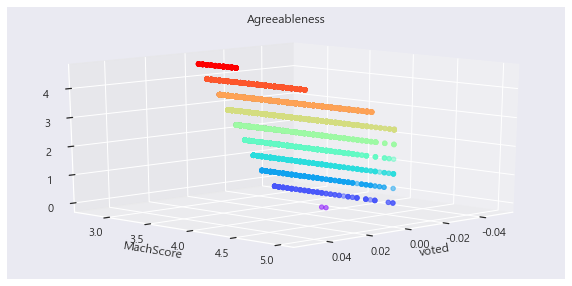

In [16]:
from mpl_toolkits.mplot3d import Axes3D

zdata = subdata[subdata['k5'] ==1]
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x = zdata.iloc[:,0]
y = zdata.iloc[:,1]
z = zdata.iloc[:,2]
ax.scatter(x, y, z, c = z, s= 20, alpha=0.5, cmap=plt.cm.rainbow)
ax.view_init(15, 45)
plt.xlabel('voted')
plt.ylabel('MachScore')
plt.title('Agreeableness')
# 1번 클러스터 높은 마키아벨리즘 점수, 투표함, 친화성이 높다.

Text(0.5, 0.92, 'Agreeableness')

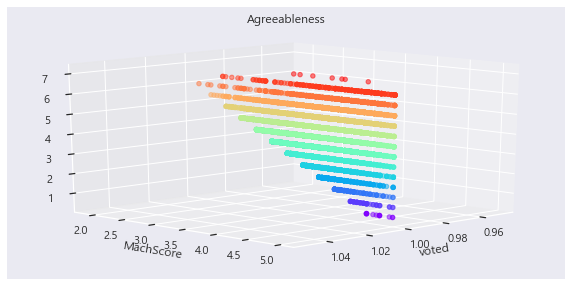

In [17]:
from mpl_toolkits.mplot3d import Axes3D
zdata = subdata[subdata['k5'] ==2]
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x = zdata.iloc[:,0]
y = zdata.iloc[:,1]
z = zdata.iloc[:,2]
ax.scatter(x, y, z, c = z, s= 20, alpha=0.5, cmap=plt.cm.rainbow)
ax.view_init(15, 45)
plt.xlabel('voted')
plt.ylabel('MachScore')
plt.title('Agreeableness')

# 2번 클러스터 높은 마키아벨리즘 점수, 투표하였음, 친화성 낮음

Text(0.5, 0.92, 'Agreeableness')

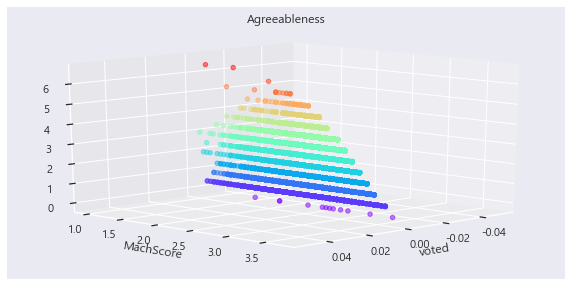

In [18]:
from mpl_toolkits.mplot3d import Axes3D
zdata = subdata[subdata['k5'] ==3]
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x = zdata.iloc[:,0]
y = zdata.iloc[:,1]
z = zdata.iloc[:,2]
ax.scatter(x, y, z, c = z, s= 20, alpha=0.5, cmap=plt.cm.rainbow)
ax.view_init(15, 45)
plt.xlabel('voted')
plt.ylabel('MachScore')
plt.title('Agreeableness')

# 3번 클러스터 중간 마키아벨리즘 점수, 투표하지 않음, 친화성이 높음

Text(0.5, 0.92, 'Agreeableness')

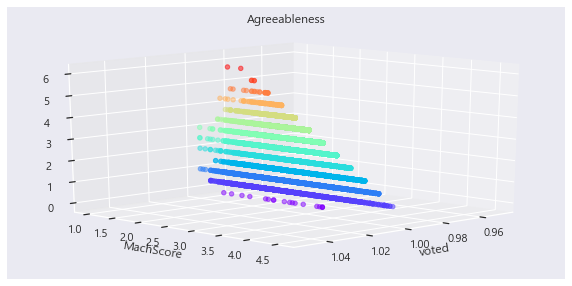

In [19]:
from mpl_toolkits.mplot3d import Axes3D
zdata = subdata[subdata['k5'] ==4]
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x = zdata.iloc[:,0]
y = zdata.iloc[:,1]
z = zdata.iloc[:,2]
ax.scatter(x, y, z, c = z, s= 20, alpha=0.5, cmap=plt.cm.rainbow)
ax.view_init(15, 45)
plt.xlabel('voted')
plt.ylabel('MachScore')
plt.title('Agreeableness')

## 4번 클러스터 높은 마키아벨리즘 점수 투표하지 않았음, 친화성 높음 

Text(0, 0.5, 'count')

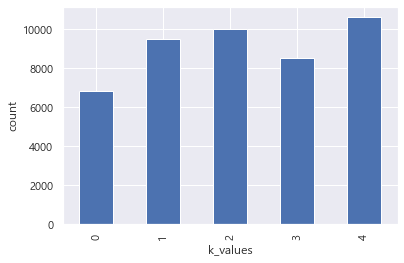

In [20]:
subdata.groupby('k5').size().plot.bar()
plt.xlabel('k_values')
plt.ylabel('count')

# 마키아벨리즘스코어와 TIPI 클러스터링 

In [21]:
from sklearn.preprocessing import StandardScaler

# data['TIPIsum']= data[['Extraversion', 'Agreeableness',
# 'Emotional Stability', 'Openness to Experiences']].sum(axis = 1)
columnlist2=['MachScore', 'Agreeableness']
subdata = data[columnlist2].copy()


mm = StandardScaler()
scaledata= mm.fit_transform(subdata)
scaledata = pd.DataFrame(scaledata,columns = columnlist2)

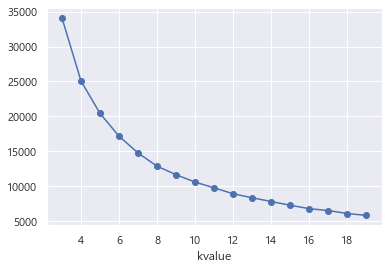

In [22]:
from sklearn.cluster import KMeans
dist =[]
for i in range(3,20):
    km = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 200)
    km.fit(scaledata)
    dist.append(km.inertia_)
plt.plot(range(3,20),dist,marker = 'o')

plt.xlabel('kvalue')
plt.show()


In [23]:
columnlist3=['MachScore', 'Agreeableness']
vdata2 = data[columnlist3]

mm = StandardScaler()
scaledata2= mm.fit_transform(vdata2)
scaledata2 = pd.DataFrame(scaledata2,columns = columnlist3)


kn = KMeans(n_clusters =4)
kn.fit(scaledata2)
ykm2= kn.predict(scaledata2)
scaledata2['k4'] = ykm2
pd.DataFrame(mm.inverse_transform(kn.cluster_centers_),columns = columnlist3).round(2)
# 0번 클러스터 : 마키아스코어 높음 , 친화성 높음 
# 1번 클러스터 : 마키아스코어 낮음 , 친화성 중간 
# 2번 클러스터 : 마키아스코어 높음 , 친화성 높음 
# 3번 클러스터 : 마키아스코어 낮음 , 친화성 낮음 


,MachScore,Agreeableness
0,4.11,4.97
1,2.87,3.53
2,3.91,2.64
3,2.50,1.47


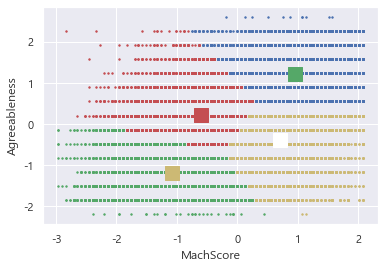

In [24]:
plt.scatter(scaledata2[scaledata2['k4'] == 0].iloc[:, 0], scaledata2[scaledata2['k4'] == 0].iloc[:,1], s =2, c='b')
plt.scatter(scaledata2[scaledata2['k4'] == 1].iloc[:, 0], scaledata2[scaledata2['k4'] == 1].iloc[:,1], s =2, c='r')
plt.scatter(scaledata2[scaledata2['k4'] == 2].iloc[:, 0], scaledata2[scaledata2['k4'] == 2].iloc[:,1], s =2, c='y')
plt.scatter(scaledata2[scaledata2['k4'] == 3].iloc[:, 0], scaledata2[scaledata2['k4'] == 3].iloc[:,1], s =2, c='g')

plt.scatter(kn.cluster_centers_[0][0],kn.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(kn.cluster_centers_[1][0],kn.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.scatter(kn.cluster_centers_[2][0],kn.cluster_centers_[2][1], s=200, c='w', marker='s')
plt.scatter(kn.cluster_centers_[3][0],kn.cluster_centers_[3][1], s=200, c='y', marker='s')
plt.xlabel('MachScore')
plt.ylabel('Agreeableness')
plt.show()

Text(0, 0.5, 'count')

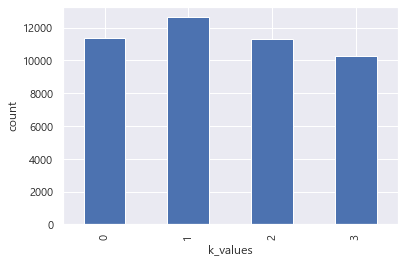

In [26]:
scaledata2.groupby('k4').size().plot.bar()
plt.xlabel('k_values')
plt.ylabel('count')
# 1번 클러스터가 높은 비중
# 3번 클러스터가 낮은 비중
# 적절한 크기와 범위로 클러스터가 나눠짐